In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def calculate_sma(data, window):
    return data.rolling(window=window, min_periods=1).mean()

def calculate_ema(data, smoothing_factor):
    return data.ewm(alpha=smoothing_factor).mean()

def centered_moving_average(data, window):
    half_window = (window - 1) // 2
    smoothed_data = pd.DataFrame(index=data.index, columns=data.columns)
    size = len(data) - 1
    for i in range(half_window):
        window = data.iloc[: i + half_window]
        smoothed_data.iloc[i] = window.mean(axis=0)
        window = data.iloc[size - half_window - i:]
        smoothed_data.iloc[size - i] = window.mean(axis=0)
        
    for i in range(half_window, len(data) - half_window):
        window = data.iloc[i - half_window : i + half_window + 1]
        smoothed_data.iloc[i] = window.mean(axis=0)
    
    return smoothed_data

def calculate_hma(data, period):
    half_period = period // 2
    wma1 = data.rolling(window=half_period, min_periods=1).mean()
    wma2 = data.rolling(window=period, min_periods=1).mean()
    sqrt_period = int(period ** 0.5)
    hma = (2 * wma1 - wma2).rolling(window=sqrt_period, min_periods=sqrt_period).mean()
    
    return hma


def calculate_mean_square_error(df1, df2):
    mse_values = np.square(df1 - df2).mean(axis=1)
    mse_dataframe = pd.DataFrame(mse_values, columns=['MSE'])
    return mse_dataframe

def calculate_mean_absolute_error(df1, df2):
    mae_values = np.abs(df1 - df2).mean(axis=1)
    mae_dataframe = pd.DataFrame(mae_values, columns=['MAE'])
    return mae_dataframe

def plot_dataframe(df):
    plt.plot(df.index, df['sum_column'])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('DataFrame Plot')
    plt.show()
    
def plot_three_dataframes(df1, df2, df3, title1, title2, title3):
    plt.plot(df1, color=(0.6, 0.9, 0.6), label=title1)
    plt.plot(df2, color='blue', label=title2)
    plt.plot(df3, color=(0.9, 0.7, 0.7), label=title3)
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Comparison of Dataframes')
    plt.show()

In [14]:
np.random.seed(123)

noise_values = np.random.uniform(low=0, high=30, size=100)
numbers = np.arange(1, 101)
f_values = -(1/50)*(numbers - 50)**2 + 20
sum_values = noise_values + f_values + 20

df = pd.DataFrame({'sum_column': sum_values})
df

,sum_column
0,12.874076
1,2.504180
2,2.625544
3,14.219443
4,21.084069
...,...
95,18.431054
96,0.353824
97,5.886289
98,-0.794323


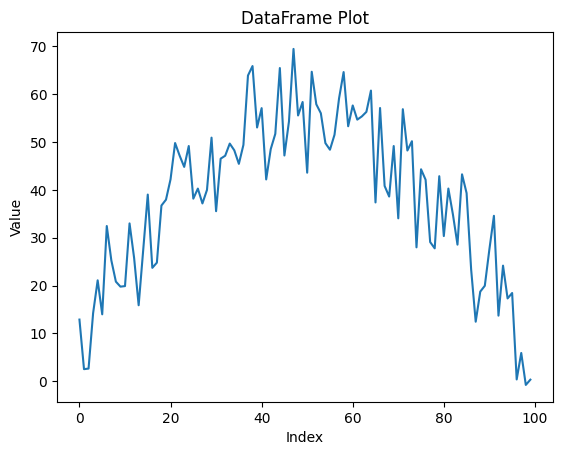

In [15]:
plot_dataframe(df)

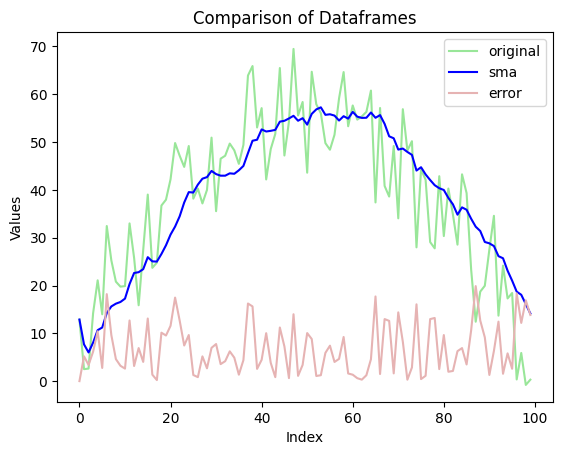

In [16]:
# Simple Moving Average (SMA)
df_sma =  df.copy()
df_sma = calculate_sma(df_sma, 10)
error_sma = calculate_mean_absolute_error(df, df_sma)
plot_three_dataframes(df, df_sma, error_sma,'original','sma','error')

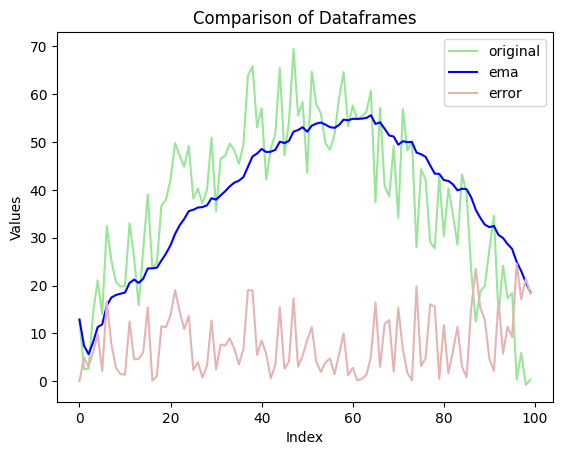

In [17]:
# Exponential Moving Average (EMA)
df_ema =  df.copy()
df_ema = calculate_ema(df_ema, 0.1)
error_ema = calculate_mean_absolute_error(df, df_ema)
plot_three_dataframes(df, df_ema, error_ema,'original','ema','error')

In [18]:
# Centered Moving Average (CMA)
df_cma = df.copy()
df_cma = centered_moving_average(df_cma, 10)
error_cma = calculate_mean_absolute_error(df, df_cmd)
plot_three_dataframes(df, df_cma, error_cma,'original','cma','error')

NameError: name 'df_cmd' is not defined

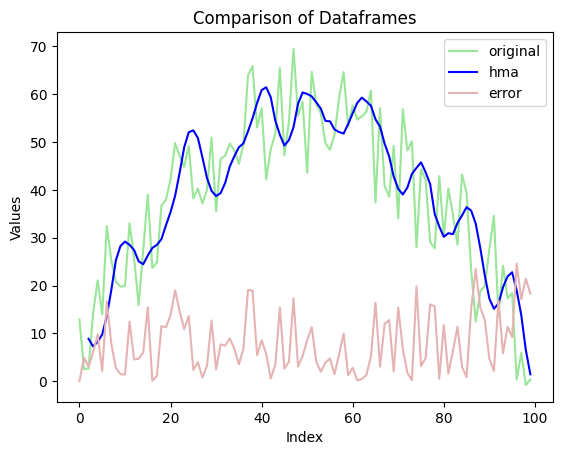

In [19]:
# Hull Moving Average (HMA)
df_hma =  df.copy()
df_hma = calculate_hma(df_hma, 10)
error_hma = calculate_mean_absolute_error(df, df_ema)
df_hma
plot_three_dataframes(df, df_hma, error_ema,'original','hma','error')

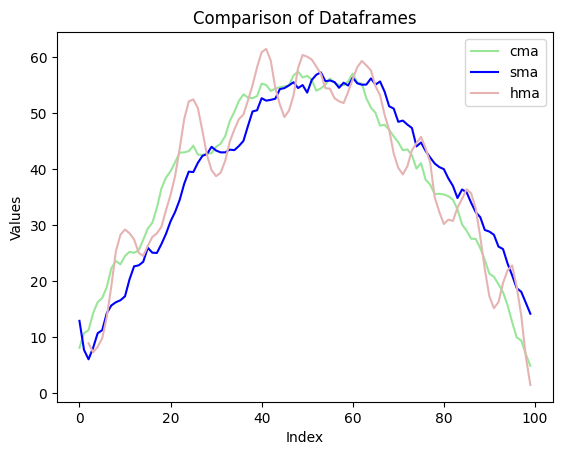

In [20]:
plot_three_dataframes(df_cma, df_sma, df_hma,'cma','sma','hma')